# Part 1 Data Augmentation

## Load dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

dataset_path = '/content/drive/MyDrive/Machine_Learning/dataset_split'

Mounted at /content/drive


In [2]:
from tensorflow.keras.preprocessing import  image_dataset_from_directory
import os

train_dir = os.path.join(dataset_path, 'train')
test_dir = os.path.join(dataset_path, 'test')
val_dir = os.path.join(dataset_path, 'validation')

train_dataset = image_dataset_from_directory(
    train_dir,  # This is the target directory
    labels="inferred",
    label_mode="binary", # Since we use binary_crossentropy loss, we need binary labels
    class_names=None,
    color_mode="rgb",
    batch_size=20,
    image_size=(150,150), # All images have different sizes and will be resized to 150x150
    shuffle=True,
)

val_dataset = image_dataset_from_directory(
    val_dir,  # This is the target directory
    labels="inferred",
    label_mode="binary", # Since we use binary_crossentropy loss, we need binary labels
    class_names=None,
    color_mode="rgb",
    batch_size=20,
    image_size=(150,150), # All images have different sizes and will be resized to 150x150
    shuffle=True,
)

test_dataset = image_dataset_from_directory(
    test_dir,  # This is the target directory
    labels="inferred",
    label_mode="binary", # Since we use binary_crossentropy loss, we need binary labels
    class_names=None,
    color_mode="rgb",
    batch_size=20,
    image_size=(150,150), # All images have different sizes and will be resized to 150x150
    shuffle=True,
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


## Model

In [12]:
import keras
from keras import layers

model = keras.Sequential()
model.add(layers.Input((150, 150, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

## Augmentation

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

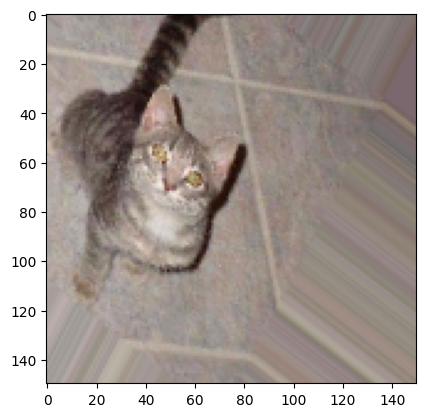

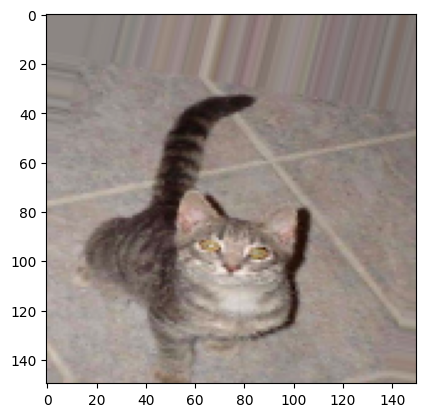

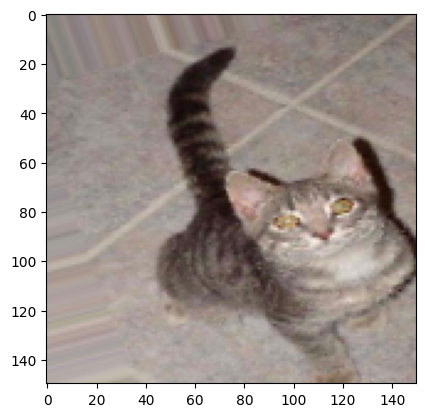

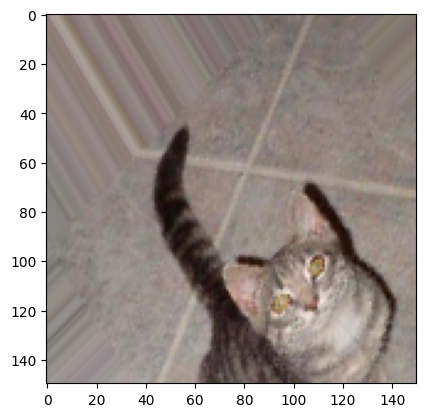

In [5]:
# This is module with image preprocessing utilities
from keras.preprocessing import image
from matplotlib import pyplot as plt

train_cats_dir = '/content/drive/MyDrive/Machine_Learning/dataset_split/train/class_a'
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# We pick one image to "augment"
img_path = fnames[3]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [14]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.1,
      horizontal_flip=True,
      fill_mode='nearest')


# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)


train_dir = '/content/drive/MyDrive/Machine_Learning/dataset_split/train'
train_generator = train_datagen.flow_from_directory(
        # Set target directory:
        train_dir,
        # Resize images to 150x150 pixels:
        target_size=(150, 150),
        # Experiment with different batches:
        batch_size=20,
        # Labels needed for binary_crossentropy loss:
        class_mode='binary')

validation_dir = '/content/drive/MyDrive/Machine_Learning/dataset_split/validation'
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit(
      train_generator,
      epochs=100,
      validation_data=validation_generator)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 246ms/step - accuracy: 0.5129 - loss: 0.7397 - val_accuracy: 0.5110 - val_loss: 0.6927
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 36s 228ms/step - accuracy: 0.5411 - loss: 0.6929 - val_accuracy: 0.5670 - val_loss: 0.6816
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 43s 240ms/step - accuracy: 0.5790 - loss: 0.6796 - val_accuracy: 0.6610 - val_loss: 0.6402
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 242ms/step - accuracy: 0.5880 - loss: 0.6597 - val_accuracy: 0.6580 - val_loss: 0.6024
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 240ms/step - accuracy: 0.6279 - loss: 0.6493 - val_accuracy: 0.6700 - val_loss: 0.6028
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 223ms/step - accuracy: 0.6626 - loss: 0.6254 - val_accuracy: 0.7060 - val_loss: 0.5771
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 24s 228ms/step - accuracy: 0.6812 - loss: 0.6024 - val_accuracy: 0.6860 - val_loss: 0.5999
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 221ms/step - accuracy: 0.6763 - loss: 0.602

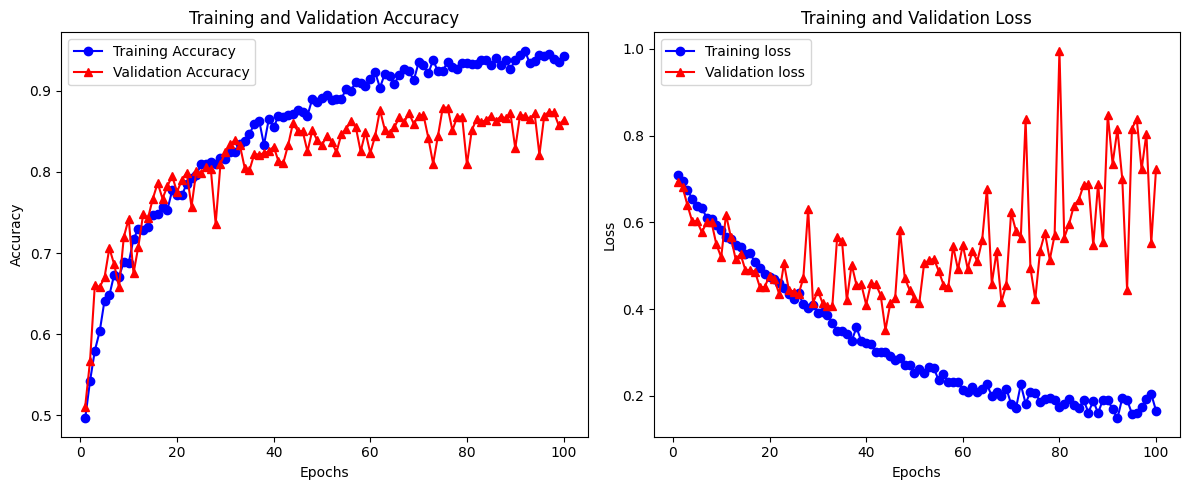

In [15]:
history_dict = history.history
history_dict.keys()

import matplotlib.pyplot as plt

epochs = range(1, len(history_dict['loss']) + 1)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(epochs, history_dict['accuracy'], 'bo-', label='Training Accuracy')
ax[0].plot(epochs, history_dict['val_accuracy'], 'r^-', label='Validation Accuracy')
ax[0].set_title('Training and Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

ax[1].plot(epochs, history_dict['loss'], 'bo-', label='Training loss')
ax[1].plot(epochs, history_dict['val_loss'], 'r^-', label='Validation loss')
ax[1].set_title('Training and Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend()

fig.tight_layout()
plt.show()

In [17]:
test_dir = '/content/drive/MyDrive/Machine_Learning/dataset_split/test'
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')


model.evaluate(test_generator)

Found 1000 images belonging to 2 classes.
 2/50 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - accuracy: 0.8625 - loss: 0.3088

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 173s 4s/step - accuracy: 0.8423 - loss: 0.6923


[0.7081576585769653, 0.8539999723434448]

## Nowsza wersja

In [5]:
import keras
from keras import layers

data_augmentation = keras.Sequential(
    [
        layers.Rescaling(1./255),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.2),
        layers.RandomZoom(0.1),
        layers.RandomTranslation(0.1, 0.1),
    ]
)

model = keras.Sequential()
model.add(layers.Input((150, 150, 3)))
model.add(data_augmentation)
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

In [8]:
# import tensorflow as tf

# train_dataset = train_dataset.cache().prefetch(tf.data.experimental.AUTOTUNE)
# val_dataset = val_dataset.cache().prefetch(tf.data.experimental.AUTOTUNE)

In [10]:
history = model.fit(
      train_dataset,
      epochs=100,
      validation_data=val_dataset)

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5041 - loss: 0.7849 - val_accuracy: 0.5310 - val_loss: 0.6899
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5358 - loss: 0.7946 - val_accuracy: 0.5310 - val_loss: 0.6856
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.5403 - loss: 0.7167 - val_accuracy: 0.5290 - val_loss: 0.6906
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.5840 - loss: 0.7018 - val_accuracy: 0.5310 - val_loss: 0.7370
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5358 - loss: 0.7051 - val_accuracy: 0.5850 - val_loss: 0.6783
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.5601 - loss: 0.7085 - val_accuracy: 0.5330 - val_loss: 0.7042
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5717 - loss: 0.6837 - val_accuracy: 0.5680 - val_loss: 0.6943
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.6074 - loss: 0.7039 - 

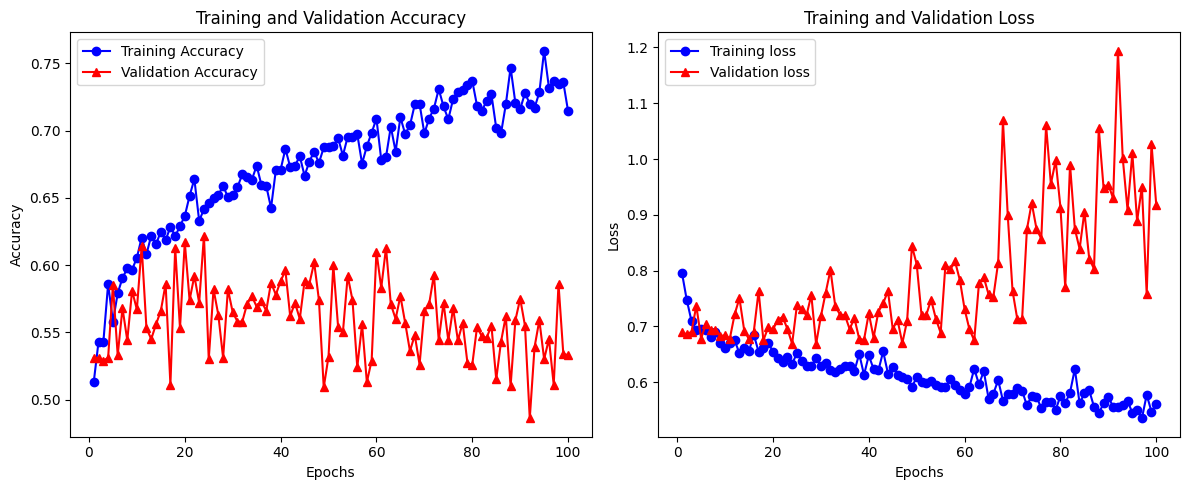

In [11]:
history_dict = history.history
history_dict.keys()

import matplotlib.pyplot as plt

epochs = range(1, len(history_dict['loss']) + 1)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(epochs, history_dict['accuracy'], 'bo-', label='Training Accuracy')
ax[0].plot(epochs, history_dict['val_accuracy'], 'r^-', label='Validation Accuracy')
ax[0].set_title('Training and Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

ax[1].plot(epochs, history_dict['loss'], 'bo-', label='Training loss')
ax[1].plot(epochs, history_dict['val_loss'], 'r^-', label='Validation loss')
ax[1].set_title('Training and Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend()

fig.tight_layout()
plt.show()

# Part 2 Adding Dropout Layer

In [18]:
model_2 = keras.Sequential()
model_2.add(layers.Input((150, 150, 3)))
model_2.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Flatten())
model_2.add(layers.Dropout(0.5))
model_2.add(layers.Dense(512, activation='relu'))
model_2.add(layers.Dense(1, activation='sigmoid'))

model_2.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

In [19]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.1,
      horizontal_flip=True,
      fill_mode='nearest')


# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)


train_dir = '/content/drive/MyDrive/Machine_Learning/dataset_split/train'
train_generator = train_datagen.flow_from_directory(
        # Set target directory:
        train_dir,
        # Resize images to 150x150 pixels:
        target_size=(150, 150),
        # Experiment with different batches:
        batch_size=20,
        # Labels needed for binary_crossentropy loss:
        class_mode='binary')

validation_dir = '/content/drive/MyDrive/Machine_Learning/dataset_split/validation'
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history_2 = model_2.fit(
      train_generator,
      epochs=100,
      validation_data=validation_generator)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 335ms/step - accuracy: 0.4898 - loss: 0.8523 - val_accuracy: 0.5000 - val_loss: 1.0284
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 24s 223ms/step - accuracy: 0.5322 - loss: 0.7140 - val_accuracy: 0.5730 - val_loss: 0.6768
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 231ms/step - accuracy: 0.5948 - loss: 0.6690 - val_accuracy: 0.5590 - val_loss: 0.6624
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 232ms/step - accuracy: 0.5961 - loss: 0.6650 - val_accuracy: 0.6320 - val_loss: 0.6270
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 225ms/step - accuracy: 0.6512 - loss: 0.6509 - val_accuracy: 0.6070 - val_loss: 0.7502
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 225ms/step - accuracy: 0.6399 - loss: 0.6308 - val_accuracy: 0.6990 - val_loss: 0.5730
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 24s 229ms/step - accuracy: 0.6652 - loss: 0.6283 - val_accuracy: 0.6920 - val_loss:

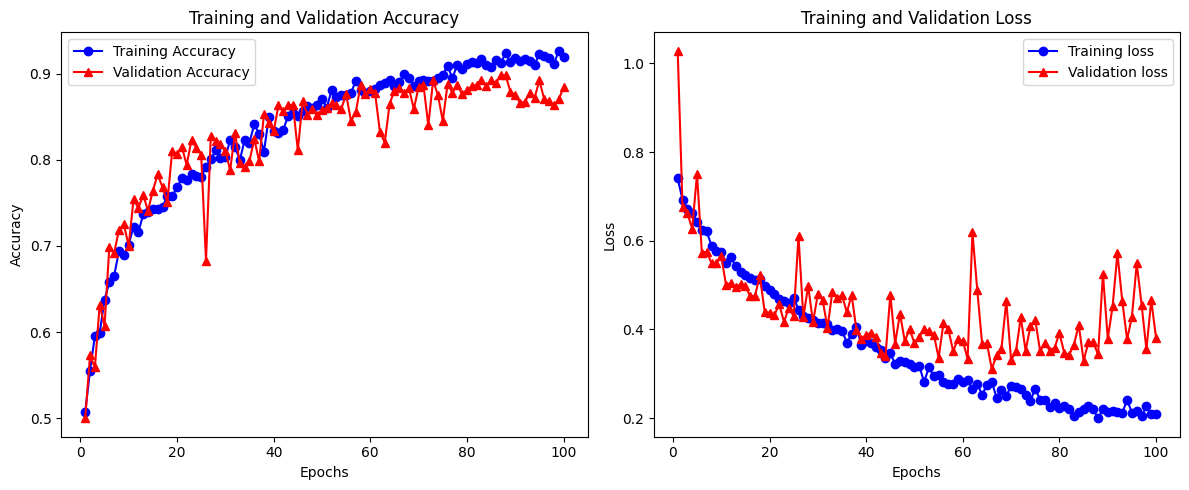

In [20]:
history_dict_2 = history_2.history
history_dict_2.keys()

import matplotlib.pyplot as plt

epochs = range(1, len(history_dict_2['loss']) + 1)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(epochs, history_dict_2['accuracy'], 'bo-', label='Training Accuracy')
ax[0].plot(epochs, history_dict_2['val_accuracy'], 'r^-', label='Validation Accuracy')
ax[0].set_title('Training and Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

ax[1].plot(epochs, history_dict_2['loss'], 'bo-', label='Training loss')
ax[1].plot(epochs, history_dict_2['val_loss'], 'r^-', label='Validation loss')
ax[1].set_title('Training and Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend()

fig.tight_layout()
plt.show()

In [21]:
test_dir = '/content/drive/MyDrive/Machine_Learning/dataset_split/test'
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')


model_2.evaluate(test_generator)

Found 1000 images belonging to 2 classes.
 2/50 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - accuracy: 0.8625 - loss: 0.3414

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.8858 - loss: 0.3250


[0.3473047614097595, 0.8880000114440918]